# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist


In [19]:
len(fashion_mnist.load_data()[1][0])

10000

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [36]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [26]:
X_train.shape[0]

60000

In [27]:
X_test.shape[0]

10000

In [28]:
X_train.shape[1] * X_train.shape[2]

784

In [31]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

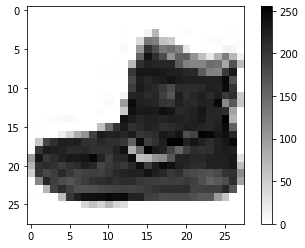

In [35]:
plt.imshow(X_train[0], cmap='binary')
plt.colorbar();

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [38]:
X_train.max()

255

In [39]:
X_train = X_train/255
X_test = X_test/255


In [41]:
X_train.min()

0.0

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

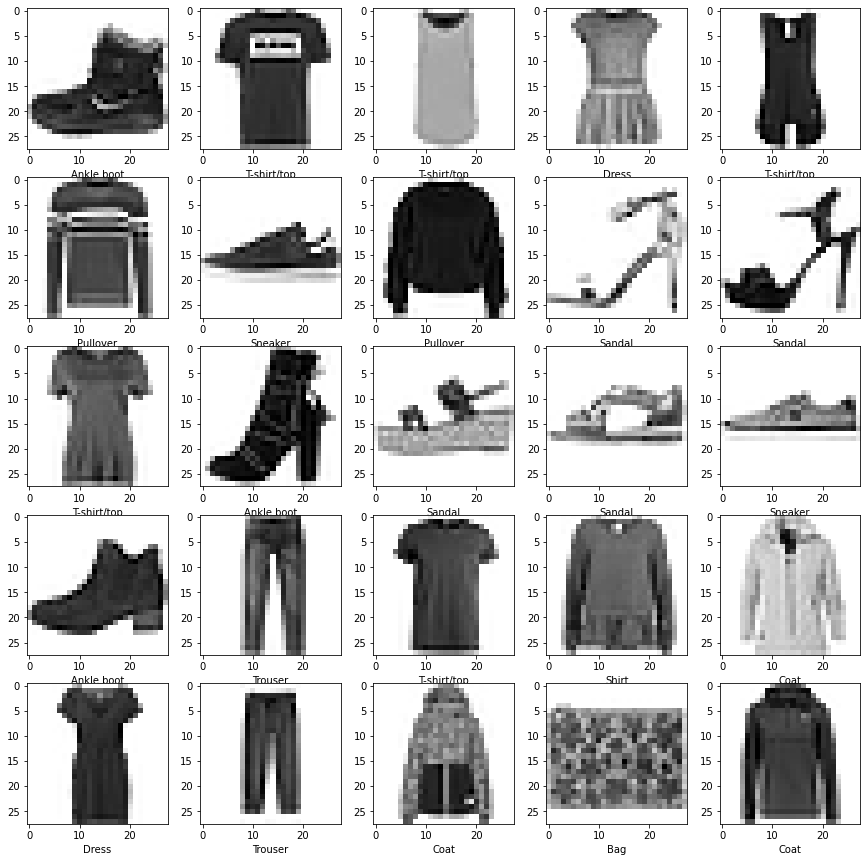

In [43]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [46]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [49]:
784 * 128 + 128

100480

In [51]:
128 * 64 + 64

8256

In [52]:
64 * 10 + 10

650

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [56]:
len(X_train)*0.9/32

1687.5

In [53]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7643 - accuracy: 0.7444 - val_loss: 0.5305 - val_accuracy: 0.8113
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5095 - accuracy: 0.8223 - val_loss: 0.4779 - val_accuracy: 0.8288
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4616 - accuracy: 0.8387 - val_loss: 0.4639 - val_accuracy: 0.8307
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4340 - accuracy: 0.8466 - val_loss: 0.4198 - val_accuracy: 0.8480
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8549 - val_loss: 0.4039 - val_accuracy: 0.8543
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3977 - accuracy: 0.8587 - val_loss: 0.4037 - val_accuracy: 0.8555
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.4082 - val_accuracy:

<AxesSubplot:>

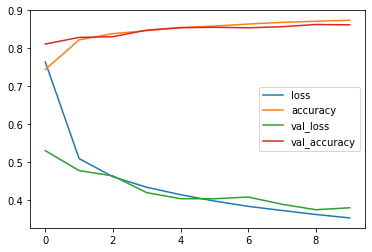

In [58]:
pd.DataFrame(history.history).plot()

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [60]:
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_split=0.1,
                   callbacks = [early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8756 - val_loss: 0.3696 - val_accuracy: 0.8685
Epoch 2/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8798 - val_loss: 0.3550 - val_accuracy: 0.8708
Epoch 3/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3297 - accuracy: 0.8812 - val_loss: 0.3704 - val_accuracy: 0.8702
Epoch 4/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3237 - accuracy: 0.8838 - val_loss: 0.3496 - val_accuracy: 0.8755
Epoch 5/50
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3170 - accuracy: 0.8849 - val_loss: 0.3444 - val_accuracy: 0.8750
Epoch 6/50
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3112 - accuracy: 0.8877 - val_loss: 0.3446 - val_accuracy: 0.8735
Epoch 7/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.8908 - val_loss: 0.3602 - val_accuracy:

<AxesSubplot:>

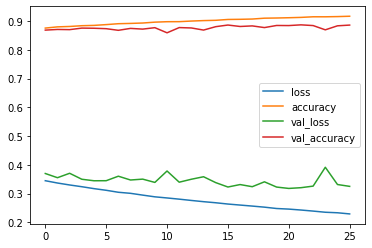

In [61]:
pd.DataFrame(history.history).plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [65]:
len(X_test)/32

312.5

In [62]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8799


[0.34443730115890503, 0.8798999786376953]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [67]:
y_pred = model.predict(X_test)
y_pred[0]

array([3.7897300e-07, 3.0577519e-07, 4.3305474e-05, 1.4715829e-05,
       1.3422384e-05, 1.9882759e-02, 2.3735371e-05, 4.7405485e-02,
       3.3015458e-04, 9.3228573e-01], dtype=float32)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [70]:
class_names[9]

'Ankle boot'

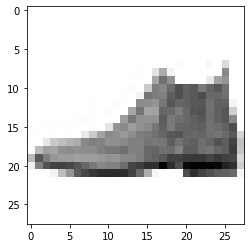

In [69]:
plt.imshow(X_test[0], cmap='binary');

In [72]:
np.argmax(y_pred[0])

9

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [74]:
y_pred[0]

array([3.7897300e-07, 3.0577519e-07, 4.3305474e-05, 1.4715829e-05,
       1.3422384e-05, 1.9882759e-02, 2.3735371e-05, 4.7405485e-02,
       3.3015458e-04, 9.3228573e-01], dtype=float32)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [75]:
class_names[np.argmax(y_pred[0])]

'Ankle boot'

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [76]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

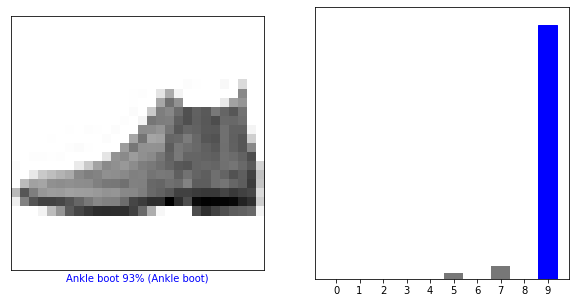

In [78]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i], y_test)

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

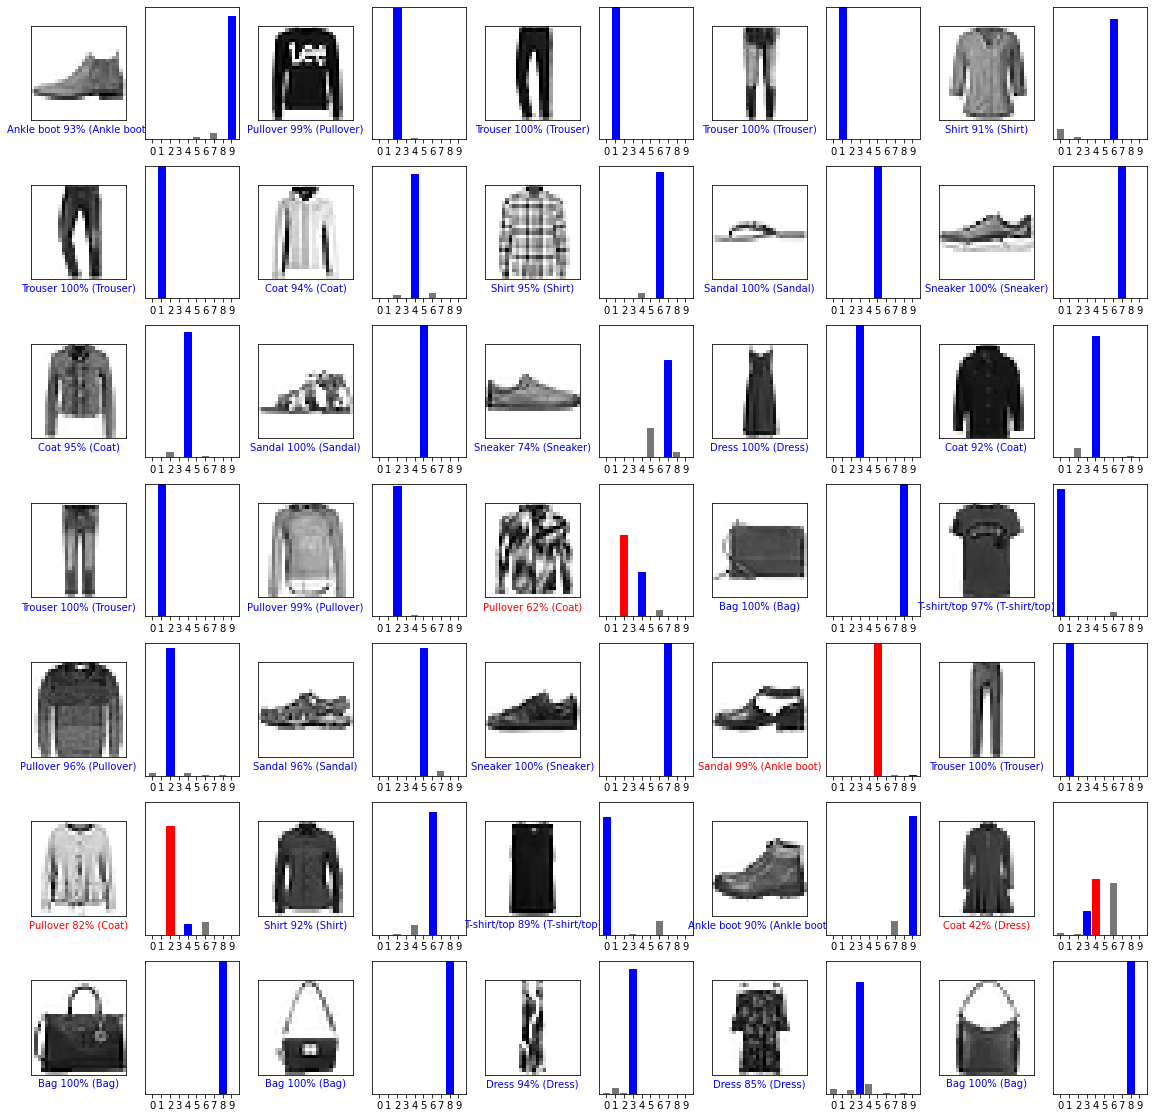

In [86]:
n_rows = 7
n_cols = 5
n_im = n_rows * n_cols

plt.figure(figsize=(20,20))

for i in range(n_im):
    # plt.figure(figsize=(10,5))
    plt.subplot(n_rows, n_cols*2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

# plt.imshow()

Evalúa tu modelo con una matriz de confusión e interprétala.

In [87]:
y_pred

array([[3.7897300e-07, 3.0577519e-07, 4.3305474e-05, ..., 4.7405485e-02,
        3.3015458e-04, 9.3228573e-01],
       [3.3738135e-05, 3.6555259e-09, 9.9072295e-01, ..., 2.2989757e-14,
        1.3743777e-07, 2.7777249e-11],
       [3.1060986e-06, 9.9999344e-01, 4.8584639e-07, ..., 4.2783821e-10,
        5.3851906e-10, 7.9801894e-12],
       ...,
       [1.2688406e-04, 3.8318455e-09, 9.1456204e-05, ..., 6.4854785e-06,
        9.9946398e-01, 1.9462865e-09],
       [5.1220883e-07, 9.9998832e-01, 4.8127106e-07, ..., 2.6209611e-07,
        2.1458331e-09, 2.7814573e-07],
       [5.4304928e-05, 1.0850896e-06, 8.5582709e-05, ..., 7.4541643e-03,
        3.5537450e-04, 1.9799432e-05]], dtype=float32)

In [88]:
pred_labels = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
pred_labels

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 6,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 6,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 5,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 3,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 4,
 8,
 6,
 2,
 6,
 2,


In [89]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, pred_labels, normalize='true')

<AxesSubplot:>

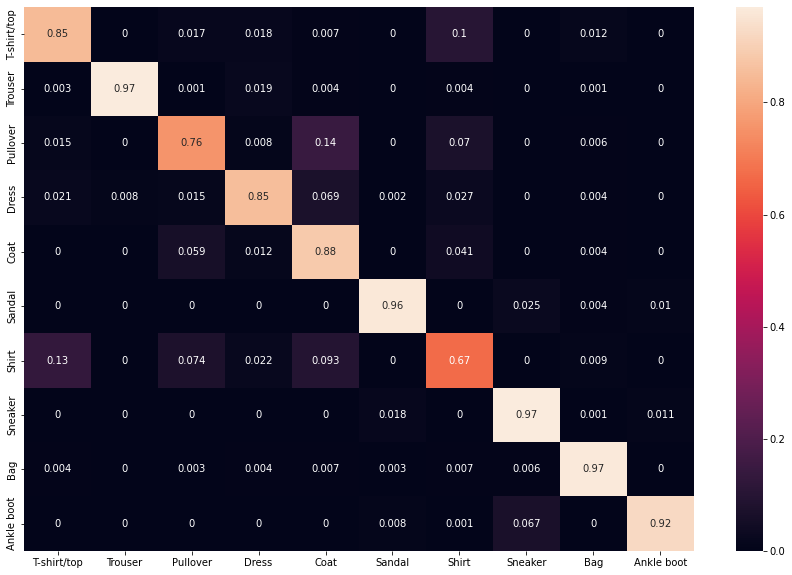

In [92]:
plt.figure(figsize=(15,10))

sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [98]:
X_test[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [101]:
class_names[np.argmax(model.predict(X_test[0:1]))]

'Ankle boot'